In [2]:
!pip install earthpy
!pip install rasterio
!pip install geopandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 73.0 MB/s eta 0:00:00


In [28]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Use geopandas for vector data and rasterio for raster data
import geopandas as gpd
import rasterio as rio
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [40]:
# Open the file using a context manager ("with rio.open" statement)
dtm_pre_arr =  rio.open('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif')


In [41]:
dtm_pre_arr= dtm_pre_arr.read()

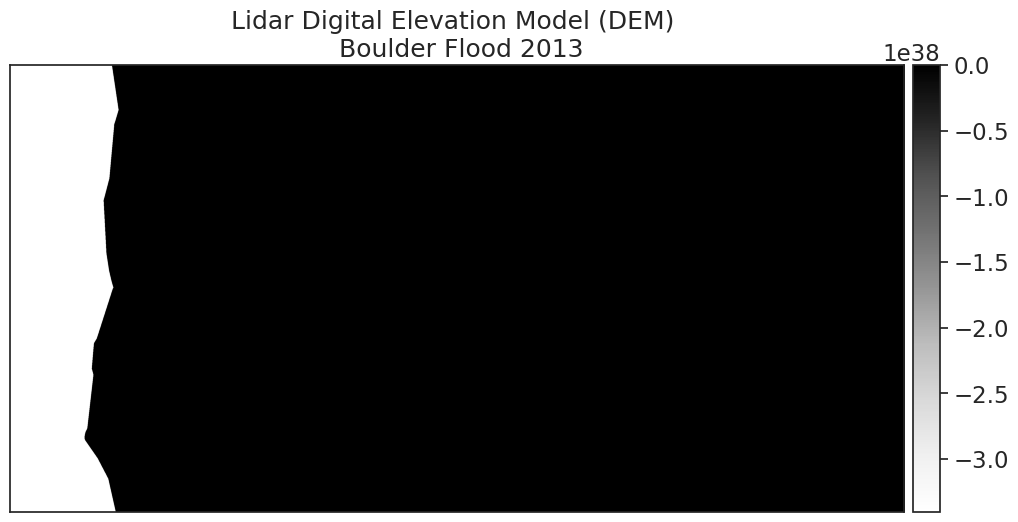

In [42]:
# Plot your data using earthpy
ep.plot_bands(dtm_pre_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")

plt.show()

In [43]:
print("the minimum raster value is: ", dtm_pre_arr.min())
print("the maximum raster value is: ", dtm_pre_arr.max())

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


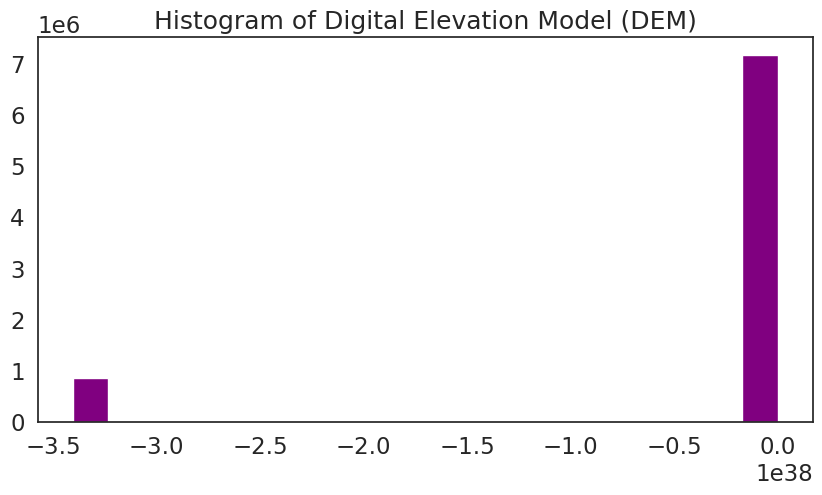

In [44]:
ep.hist(dtm_pre_arr, figsize=(10, 5))
plt.title("Histogram of Digital Elevation Model (DEM)")

plt.show()

In [49]:
# Read in your data and mask the no data values
with rio.open('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

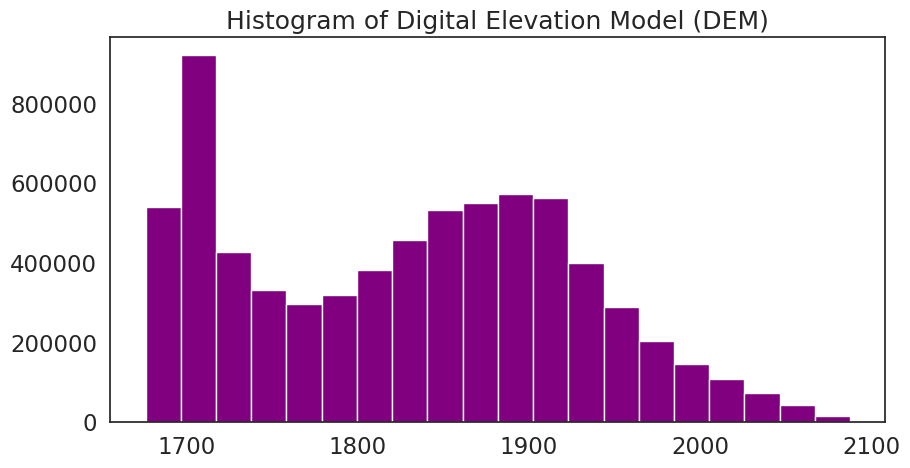

In [50]:
ep.hist(dtm_pre_arr, figsize=(10, 5))
plt.title("Histogram of Digital Elevation Model (DEM)")

plt.show()

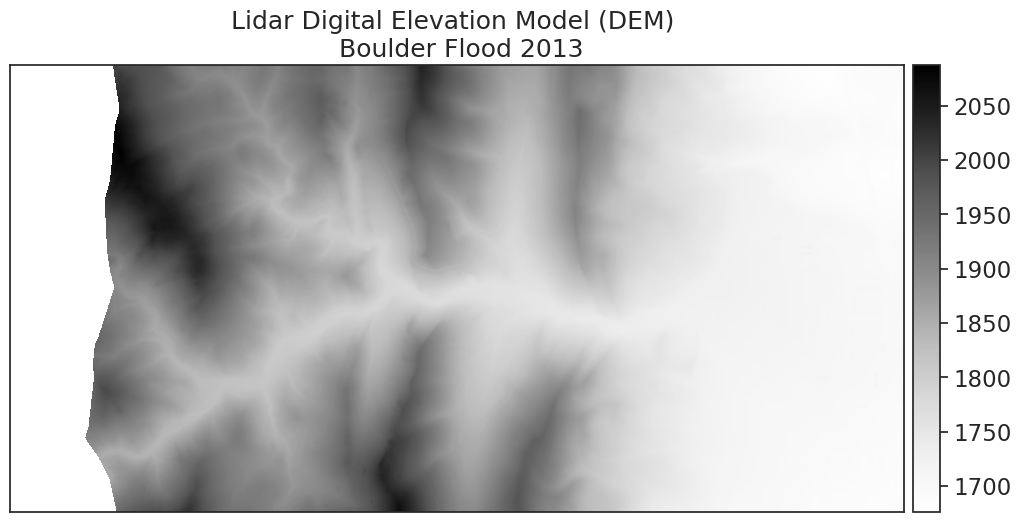

In [54]:
ep.plot_bands(dtm_pre_arr, cmap="Greys",title="Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
plt.show()

In [61]:
with rio.open('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)

print("Numpy Array Shape:", lidar_dem_im.shape)
print("Object type:", type(lidar_dem_im))


Numpy Array Shape: (2000, 4000)
Object type: <class 'numpy.ma.core.MaskedArray'>


In [62]:
with rio.open('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)
    # Create an object called lidar_dem_meta that contains the spatial metadata
    lidar_dem_meta = dem_src.profile

lidar_dem_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]'), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In [65]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.8 MB/s eta 0:00:00


In [66]:
import rioxarray as rxr

In [71]:
dtm = rxr.open_rasterio('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif',masked=True)

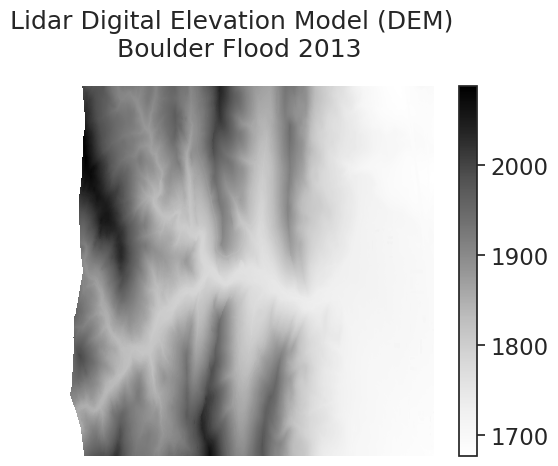

In [72]:
dtm.plot(cmap='Greys')
plt.axis('off')
plt.title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
plt.show()

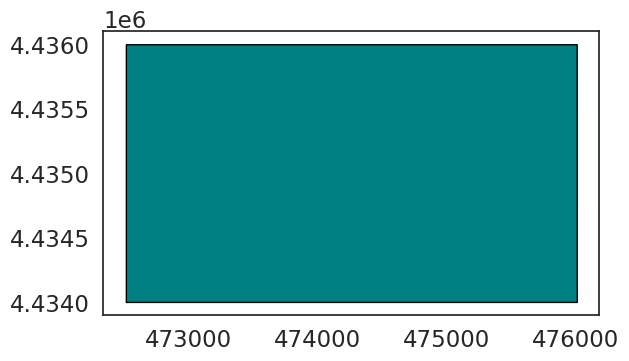

In [73]:
# Open site boundary vector layer

site_bound_shp = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/clip-extent.shp')

# Plot the vector data
site_bound_shp.plot(color='teal',
                    edgecolor='black')
plt.show()

In [77]:
with rio.open('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as dem_src:
    lidar_dem_im = dem_src.read(1, masked=True)
    # Create an object called lidar_dem_plot_ext that contains the spatial metadata
    lidar_dem_plot_ext = plotting_extent(dem_src)

# This plotting extent object will be used below to ensure your data overlay correctly
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

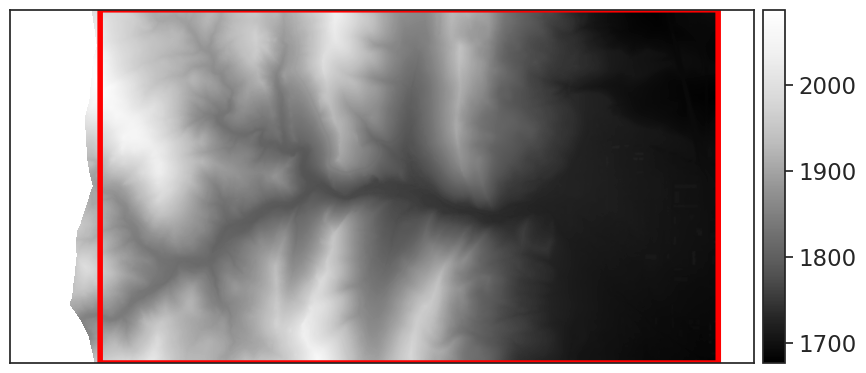

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(dtm_pre_arr, ax=ax, extent= lidar_dem_plot_ext)

site_bound_shp.plot(color='None',
                    edgecolor='Red', ax=ax, linewidth=4)

plt.show()